# AJAX Fifa Project

#### We are an agent for Ajax, and our goal is to part ways with one of our central defenders to replace them with a young prospect. To achieve this, we will analyze the player market to understand which variables are related to their success, as well as the potential for future profit when we sell them.

#### First, we will begin by preparing our data, thoroughly cleaning the entire database, and identifying the variables of interest. We will create visualizations to help us gain a better understanding and study correlations to gather crucial information.

#### Finally, we will search the player market with the criteria that matter to us, aiming to find players who could be valuable acquisitions.

## Exploratory

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.read_csv('Fifa 23 Players Data.csv')
pd.set_option('display.max_columns', None)

In [3]:
fifa = pd.read_csv('Fifa 23 Players Data.csv')

# the column names have some signs that we have to clean

fifa.columns = [col.strip() for col in fifa.columns]
fifa.columns = fifa.columns.str.replace(' ', '_')

In [4]:
fifa2 = fifa.copy()
column_names = fifa2.columns

In [5]:
# we should drop all the columns that don't give us any true value for our analysis

columns_to_drop = ['Known_As', 'Image_Link','Height(in_cm)', 'Weight(in_kg)', 'TotalStats', 'BaseStats',
       'Club_Position', 'Club_Jersey_Number', 'Joined_On', 'On_Loan','Preferred_Foot', 'Weak_Foot_Rating',
       'International_Reputation', 'National_Team_Name','National_Team_Image_Link','National_Team_Jersey_Number',
       'Crossing','Finishing','Heading_Accuracy','Short_Passing','Volleys','Dribbling','Curve','Freekick_Accuracy',
       'LongPassing','BallControl','Acceleration','Sprint_Speed','Agility','Reactions','Balance','Shot_Power','Jumping',
       'Stamina','Strength','Long_Shots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure',
       'Marking','Standing_Tackle','Sliding_Tackle','Goalkeeper_Diving','Goalkeeper_Handling','GoalkeeperKicking',
       'Goalkeeper_Positioning','Goalkeeper_Reflexes','ST_Rating','LW_Rating','LF_Rating','CF_Rating','RF_Rating',
       'RW_Rating','CAM_Rating','LM_Rating','CM_Rating','RM_Rating','LWB_Rating','CDM_Rating','RWB_Rating','LB_Rating',
       'CB_Rating','RB_Rating','GK_Rating']

fifa3 = fifa2.drop(columns = columns_to_drop)

# There are significant outliers in players over 40 year old ,so let's remove them

fifa3 = fifa3[fifa3['Age'] <= 40]

fifa3.head(3)

Full_Name  Overall  Potential  Value(in_Euro) Positions_Played  \
0        Lionel Messi       91         91        54000000               RW   
1       Karim Benzema       91         91        64000000            CF,ST   
2  Robert Lewandowski       91         91        84000000               ST   

  Best_Position Nationality  Age            Club_Name  Wage(in_Euro)  \
0           CAM   Argentina   35  Paris Saint-Germain         195000   
1            CF      France   34       Real Madrid CF         450000   
2            ST      Poland   33         FC Barcelona         420000   

   Release_Clause Contract_Until  Skill_Moves National_Team_Position  \
0        99900000           2023            4                     RW   
1       131199999           2023            4                     ST   
2       172200000           2025            4                     ST   

  Attacking_Work_Rate Defensive_Work_Rate  Pace_Total  Shooting_Total  \
0                 Low                 Low          81              89   
1              Medium              Medium          80              88   
2                High              Medium          75              91   

   Passing_Total  Dribbling_Total  Defending_Total  Physicality_Total  
0             90               94               34                 64  
1             83               87               39                 78  
2             79               86               44                 83

## Correlation among numeric columns

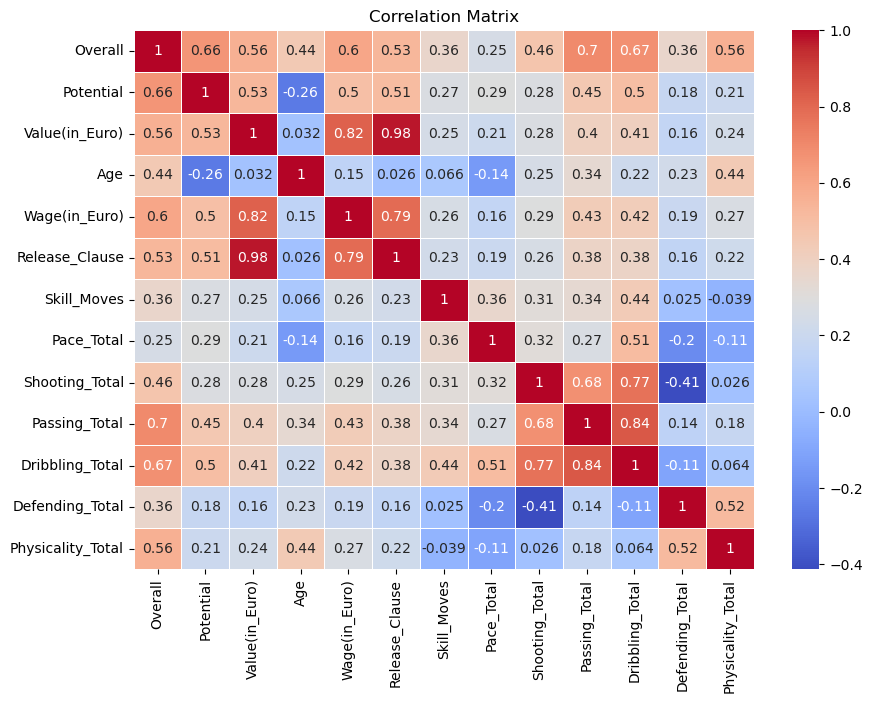

In [6]:
fifa_num = fifa3.select_dtypes(include = [np.number])
correlation_matrix = fifa_num.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
      


In [7]:
# The results may not be very informative, as it is possible that the categorical columns provide more information 

## Correlation among categorical - numerical columns

In [8]:
# We are going to select Best_Position column, as we want to know what are the best predictors for each position

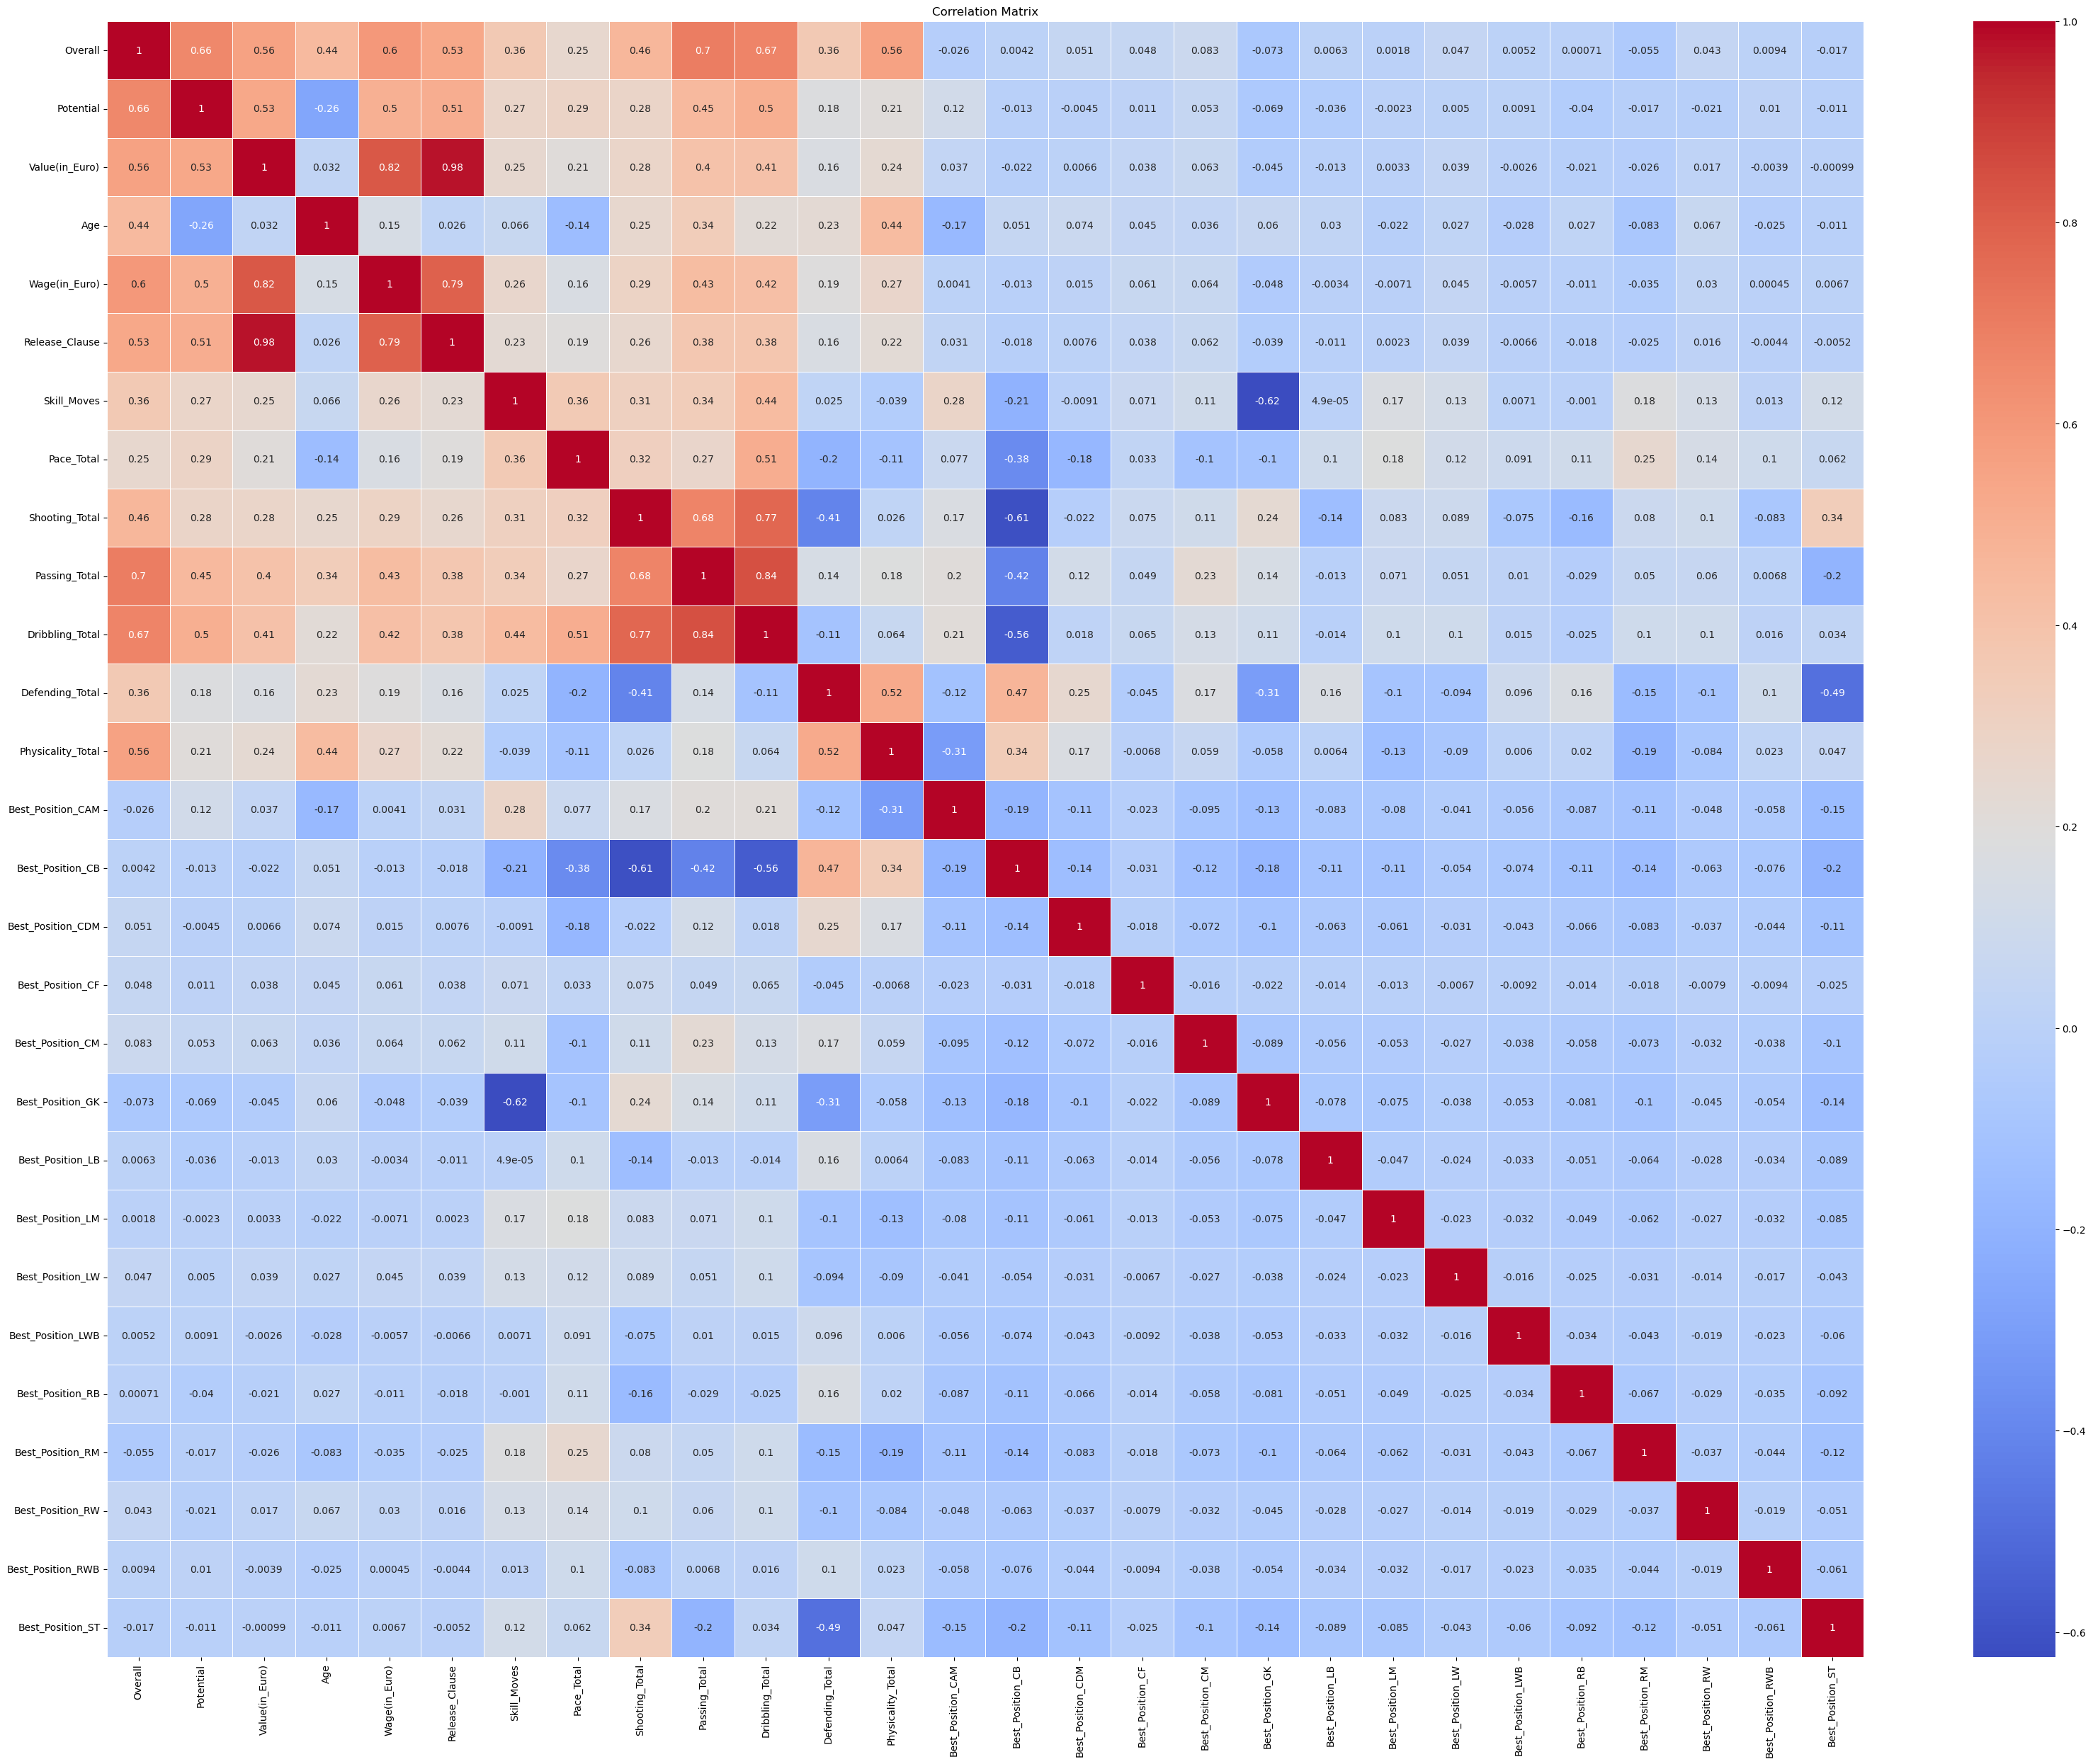

In [9]:
fifa4 = pd.get_dummies(fifa3, columns=['Best_Position'], prefix='Best_Position')
# We can choose whatever column
fifa_num2 = fifa4.select_dtypes(include=[np.number])
correlation_matrix = fifa_num2.corr()

plt.figure(figsize=(40, 30))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Include here analysis made by Miguel

## Analysis by age: Potential, Value and Overall

In [10]:
grouped_age = fifa3.groupby('Age').agg({'Potential': 'mean', 'Value(in_Euro)': 'mean', 'Overall': 'mean', 'Release_Clause':'mean'})

top_3_potential_byage = grouped_age.sort_values(by='Potential', ascending=False).head(3)

top_3_potential_byage

Potential  Value(in_Euro)    Overall  Release_Clause
Age                                                      
17   74.373494   692570.281124  56.381526    1.650398e+06
18   73.984026   754201.277955  58.070288    1.586059e+06
16   73.806452   378064.516129  54.548387    8.887419e+05

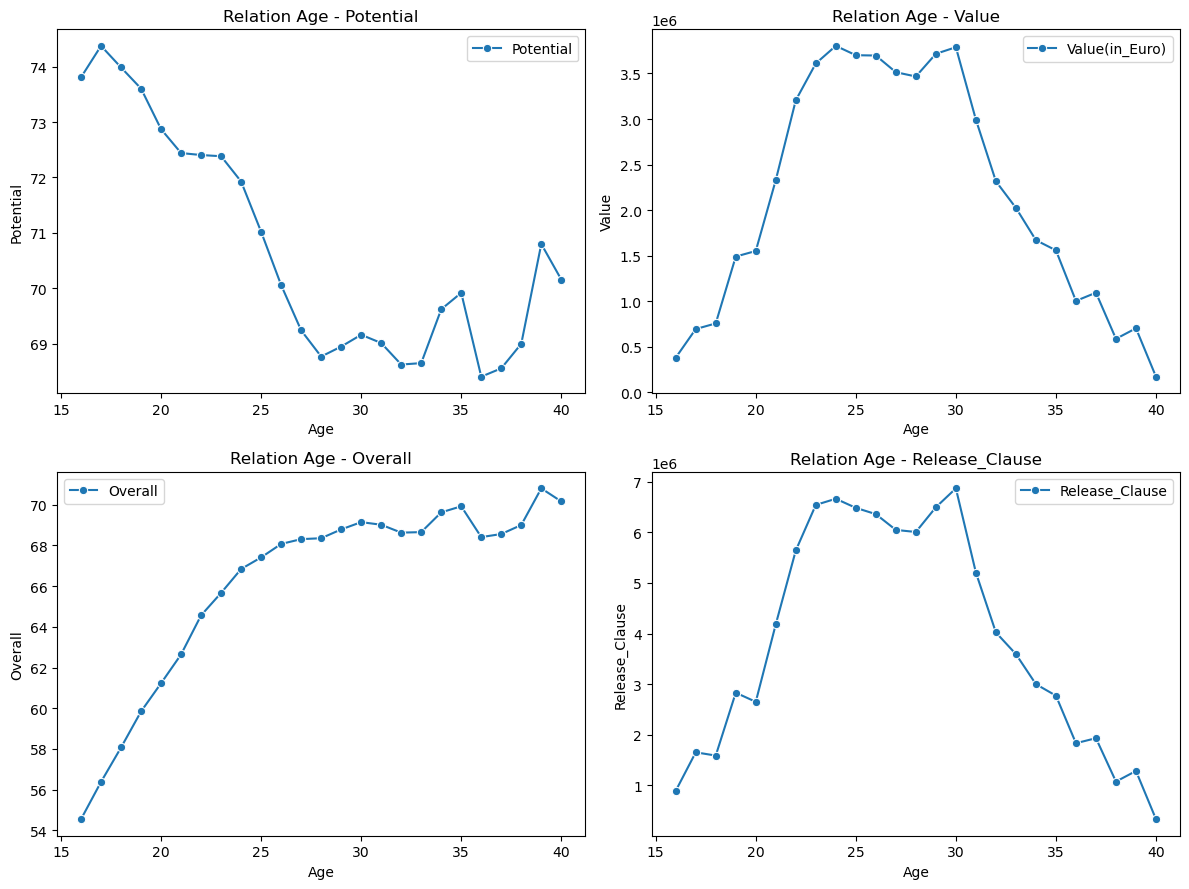

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

sns.lineplot(data=grouped_age, x='Age', y='Potential', label='Potential', marker='o', ax=axes[0, 0])
axes[0, 0].set_title('Relation Age - Potential')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Potential')

sns.lineplot(data=grouped_age, x='Age', y='Value(in_Euro)', label='Value(in_Euro)', marker='o', ax=axes[0, 1])
axes[0, 1].set_title('Relation Age - Value')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Value')

sns.lineplot(data=grouped_age, x='Age', y='Overall', label='Overall', marker='o', ax=axes[1, 0])
axes[1, 0].set_title('Relation Age - Overall')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Overall')

sns.lineplot(data=grouped_age, x='Age', y='Release_Clause', label='Release_Clause', marker='o', ax=axes[1, 1])
axes[1, 1].set_title('Relation Age - Release_Clause')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Release_Clause')

plt.tight_layout()
plt.show()

In [27]:
# Correlation between Age and Potential
cor_age_pot = fifa3['Age'].corr(fifa3['Potential'])
cor_age_pot

-0.2638692227488566

In [28]:
# Correlation between Age and Value
cor_age_val = fifa3['Age'].corr(fifa3['Value(in_Euro)'])
cor_age_val

0.031621740957541694

In [29]:
# Correlation between Age and Overall
cor_age_ovr = fifa3['Age'].corr(fifa3['Overall'])
cor_age_ovr

0.44340267056657345

#### We can see that most interesting players to adquire are those between 18 an 21 year old, so they still have a low release clause, and their value and overall tend to increase. Besides, they still have a huge potential.

#### The correlation between Age and Potential is negative, so the more time past, the less potential they have. In the other hand, there is a positive correlation with Overall results. The correlation with value doesn't say anything, probably because there is a bell shape for this data.

## Prediction of Value based on Age for CB players

In [31]:
from sklearn.linear_model import LinearRegression

#let's create a new df where we select only CBs with an Overall over 80
fifa_cb = fifa3[(fifa3['Best_Position'] == 'CB') & (fifa3['Overall'] > 80)]

x_age = fifa_cb['Age'].values  
y_value = fifa_cb['Value(in_Euro)'].values 
model = LinearRegression()

x_age = x_age.reshape(-1, 1) 
y_value = y_value.reshape(-1, 1)  

model.fit(x_age, y_value)

# These are the ages where I want to predict the value
x_new_values = [16, 18, 20, 22, 35]  

for x_new in x_new_values:
    y_pred = model.predict([[x_new]])
    print(f"The value predicted for a CB player with {x_new}yo is {y_pred[0][0]:.2f}€")


The value predicted for a CB player with 16yo is 75175506.98€
The value predicted for a CB player with 18yo is 68870642.68€
The value predicted for a CB player with 20yo is 62565778.38€
The value predicted for a CB player with 22yo is 56260914.08€
The value predicted for a CB player with 35yo is 15279296.14€


## Choosing players

In [15]:
'''CATTER + REGR relacionadas con el valor y/o el potencial por edad, así vemos cuánto pueden valer
Predicción de cuánto ganamos en unos años
Cuánto dinero usamos para fichar? nos fijamos en jugadores similares con valores parecidos
perfil de CG central back'''

'CATTER + REGR relacionadas con el valor y/o el potencial por edad, así vemos cuánto pueden valer\nPredicción de cuánto ganamos en unos años\nCuánto dinero usamos para fichar? nos fijamos en jugadores similares con valores parecidos\nperfil de CG central back'

#### Let's select those player over 16yo and less than 30yo with an overall over quantile 65

In [30]:
fifa_cb_age = fifa_cb[(fifa_cb['Age'] >= 16) & (fifa_cb['Age'] <= 30) & (fifa_cb['Overall'] > fifa_cb['Overall'].quantile(0.65))]
fifa_cb_age = fifa_cb_age.sort_values(by='Age')
fifa_cb_age.head()

Full_Name  Overall  Potential  Value(in_Euro)  \
84       Matthijs de Ligt       85         89        71000000   
137    Alessandro Bastoni       84         90        60500000   
129          Jules Koundé       84         89        57500000   
133  Éder Gabriel Militão       84         89        57500000   
145         Fikayo Tomori       84         90        60500000   

    Positions_Played Best_Position  Nationality  Age          Club_Name  \
84                CB            CB  Netherlands   22  FC Bayern München   
137               CB            CB        Italy   23              Inter   
129            CB,RB            CB       France   23       FC Barcelona   
133               CB            CB       Brazil   24     Real Madrid CF   
145               CB            CB      England   24           AC Milan   

     Wage(in_Euro)  Release_Clause Contract_Until  Skill_Moves  \
84           77000       122500000           2027            2   
137          75000       111900000           2024            2   
129         150000       122200000           2027            2   
133         160000       122200000           2025            2   
145          75000       115000000           2027            2   

    National_Team_Position Attacking_Work_Rate Defensive_Work_Rate  \
84                      CB              Medium                High   
137                     CB              Medium                High   
129                    SUB                High                High   
133                      -              Medium              Medium   
145                      -              Medium                High   

     Pace_Total  Shooting_Total  Passing_Total  Dribbling_Total  \
84           75              59             61               69   
137          73              35             69               71   
129          84              45             64               74   
133          86              50             70               72   
145          86              40             60               66   

     Defending_Total  Physicality_Total  
84                84                 87  
137               86                 82  
129               85                 78  
133               85                 82  
145               86                 81

#### Now let's take a look at our own team, specially our CB players

In [24]:
ajax = fifa3[fifa3['Club_Name'] == 'Ajax']
ajax_CB = ajax[ajax['Best_Position'].str.contains('CB', case=True, na=False)]
ajax_CB

Full_Name  Overall  Potential  Value(in_Euro) Positions_Played  \
396       Edson Álvarez       80         84        27500000           CDM,CM   
405      Jurriën Timber       80         88        44500000            CB,RB   
4054  Lisandro Magallán       71         71         1600000               CB   
7444    Ahmetcan Kaplan       67         79         2300000               CB   

     Best_Position  Nationality  Age Club_Name  Wage(in_Euro)  Release_Clause  \
396             CB       Mexico   24      Ajax          17000        40600000   
405             CB  Netherlands   21      Ajax          14000        71200000   
4054            CB    Argentina   28      Ajax          10000         2200000   
7444            CB       Turkey   19      Ajax           3000         3700000   

     Contract_Until  Skill_Moves National_Team_Position Attacking_Work_Rate  \
396            2025            2                    CDM                 Low   
405            2025            3                    SUB                High   
4054           2023            2                      -                 Low   
7444           2027            2                      -              Medium   

     Defensive_Work_Rate  Pace_Total  Shooting_Total  Passing_Total  \
396                 High          71              57             67   
405               Medium          82              47             67   
4054              Medium          48              38             52   
7444              Medium          63              30             42   

      Dribbling_Total  Defending_Total  Physicality_Total  
396                69               82                 86  
405                77               81                 81  
4054               58               71                 78  
7444               48               67                 70